# DASC5301 Data Science, Fall 2021, Chengkai Li, Unversity of Texas at Arlington
# Programming Assignment 3
# Due: Friday, December 3, 2021, 11:59pm


## **Academic Honesty**
1. This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.
2. You can discuss topics related to the assignment with your fellow students. But you are not allowed to discuss/share your solution and code.

## **Requirements**

1. When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab. 

2. You should fill in your answer for each task inside the code block right below the task. 

3. You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook, unless otherwise instructed.

4.  For each code block, you are free to use multiple lines of code. Tasks 1-4 only need one line (or a few) each. Tasks 5 and 6 will need longer codes.

5.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit. 

6.   However, your code should not raise errors. Any code raising errors will not get partial credit. 

7.   We will test your code in Google Colab. Make sure your code runs in Google Colab.

8. For classification, you are expected to use `scikit-learn` (http://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Refer to our Colab on classification for a tutorial of how to use scikit-learn to build classification models. The Colab has been on the Syllabus page and has been explained during lectures. Its link is https://colab.research.google.com/drive/1_1N7Hz3-mM2GAatME1JBEMW5ibqJpewe. 

9. For feature extraction and data manipulation, you are expected to use `pandas` and `NumPy`, which we studied in the first half of this semester. 

10.   To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.

11.   Submit the downloaded .ipynb file into the Programming Assignment 3 entry in Canvas.

## **Datasets**

In this assignment, we will use Python `scikit-learn` to build a classifier on a dataset about data science workers and learners. This dataset has close to three thousand rows and quite many complex columns. To make it easier to get started, we also provide a smaller dataset with less columns. Both datasets are provided as CSV files in the assignment's entry in canvas. You will need to upload these CSV files to your Google Colab working directory. Once the CSV files are in your working directory, let's load the small CSV file `small_ds_workers_learners.csv` into a pandas DataFrame.

In [1]:
import pandas as pd
survey = pd.read_csv('small_ds_workers_learners.csv', delimiter=',', decimal=",")

Let's gain some basic understanding of the dataset by using `info()`.

In [2]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Yearly salary                                    1845 non-null   object
 1   Years of experience in machine learning methods  2462 non-null   object
 2   Most frequently used big data products           624 non-null    object
 3   Regularly use Scikit-learn                       1433 non-null   object
dtypes: object(4)
memory usage: 82.9+ KB


We can see that there are null values in every column, since the non-null count of each column is less than 2650. We will make `Yearly salary` the class/prediction attribute. Therefore, let's go ahead to remove rows with missing values in column `Yearly salary`. 

In [3]:
survey = survey[survey['Yearly salary'].notna()]

Now let's find out all distinct values in column `Yearly salary`.

In [4]:
survey['Yearly salary'].unique()

array(['15,000-19,999', '100,000-124,999', '70,000-79,999',
       '300,000-499,999', '200,000-249,999', '125,000-149,999',
       '60,000-69,999', '25,000-29,999', '250,000-299,999',
       '80,000-89,999', '40,000-49,999', '150,000-199,999', '0-999',
       '90,000-99,999', '30,000-39,999', '50,000-59,999', '10,000-14,999',
       '500,000-999,999', '4,000-4,999', '1,000-1,999', '2,000-2,999',
       '>1,000,000', '20,000-24,999', '7,500-9,999', '5,000-7,499',
       '3,000-3,999'], dtype=object)

**The classification task in this assignment is to predict whether a data science worker/learner makes more than \$100K in a year or not, i.e., it is a binary classification task**. Hence, we now replace all salary values less than \$100K with 'No', and replace all other values with 'Yes'.

In [5]:
survey['Yearly salary'] = survey['Yearly salary'].map({'100,000-149,999': 'Yes', '150,000-199,999': 'Yes', '200,000-249,999': 'Yes', '250,000-299,999': 'Yes', '300,000-499,999': 'Yes', '500,000-999,999': 'Yes', '>1,000,000': 'Yes'})
survey.loc[survey['Yearly salary'] != 'Yes', 'Yearly salary'] = 'No'

Now let's take a look at the first 20 rows after these transformations. 

In [6]:
survey.head(20)

,Yearly salary,Years of experience in machine learning methods,Most frequently used big data products,Regularly use Scikit-learn
1,No,3-4 years,MySQL,Yes
3,No,4-5 years,NaN,Yes
4,No,I do not use machine learning methods,NaN,NaN
5,Yes,I do not use machine learning methods,MySQL,NaN
6,Yes,5-10 years,PostgreSQL,Yes
7,No,1-2 years,NaN,Yes
8,No,5-10 years,Microsoft SQL Server,NaN
9,No,Under 1 year,NaN,Yes
10,No,I do not use machine learning methods,NaN,NaN
11,No,4-5 years,NaN,Yes


## **Data Munging**

From the table above, we see that none of the columns has numberic values. In `scikit-learn`, there are limited ways of building models that directly work with catagorical attributes. We need to preprocess these columns before we can build and evaluate models. More specifically, we need to encode these columns in numeric values. The 3 feature columns in this small dataset are different and we will pre-process each in a different way. In fact, they represent the three types of columns in the larger dataset. Therefore, the following tasks of pre-processing the small dataset will prepare you for working on the larger dataset. 

### **1. Binary attribute: `Regularly use Scikit-learn`**

The column `Regularly use Scikit-learn` describes whether a person uses `scikit-learn` on a regular basis. It has two values 'Yes' and NaN (i.e., null value). Based on how the dataset was created, NaN here means 'No'. Let's replace the values in this column with `1` and `0`.

## **Task 1: In column `Regularly use Scikit-learn`, replace 'Yes' by `1`. (5 points)** 

*Hint: You can use `replace()`. There are definitely many other ways and you are free to use any approach that works. In Programming Assignment 2, there are similar tasks.*

In [7]:
# Code for Task 1
survey.replace(to_replace = {'Regularly use Scikit-learn': 'Yes'}, value = 1, inplace = True)

## **Task 2: In column `Regularly use Scikit-learn`, replace NaN by `0`. (5 points)** 

*Hint: You can use `fillna()`. There are definitely many other ways and you are free to use any approach that works. In Programming Assignment 2, there are similar tasks.*

In [8]:
# Code for Task 2
survey['Regularly use Scikit-learn'].fillna(0, inplace=True)

If you code is correct, the results of `survey.head(20)` will be as follows. Note that the values are floating-point numbers. Feel free to use integers. It may or may not have an impact on your clssifier accruacy and it is up to you to explore.

In [9]:
survey.head(20)

,Yearly salary,Years of experience in machine learning methods,Most frequently used big data products,Regularly use Scikit-learn
1,No,3-4 years,MySQL,1.0
3,No,4-5 years,NaN,1.0
4,No,I do not use machine learning methods,NaN,0.0
5,Yes,I do not use machine learning methods,MySQL,0.0
6,Yes,5-10 years,PostgreSQL,1.0
7,No,1-2 years,NaN,1.0
8,No,5-10 years,Microsoft SQL Server,0.0
9,No,Under 1 year,NaN,1.0
10,No,I do not use machine learning methods,NaN,0.0
11,No,4-5 years,NaN,1.0


### **2. Nominal attribute: `Most frequently used big data products`**

The column `Most frequently used big data products` describes the big data product that a person uses most frequently. It has values such as `MySQL`, `PostgreSQL` and so on. Based on what we learned earlier in the semester, this is a nominal attribute in that there isn't a meaningful order among the attribute values. We will use one-hot encoding to represent this attribute. More specifically, we will make one new binary-value column for each distinct big data product. A row has value `1` or `0` in that new column, based on its value in the original `Most frequently used big data products` column. In Programm Assignment 2, we actually performed similar operations. 

Go ahead to apply the following code. After that, the results of `survey.head(20)` show the new columns, each with the prefix `Bigd`. Note that we also dropped the original column `Most frequently used big data products`.


In [10]:
bigd = pd.get_dummies(survey['Most frequently used big data products'], prefix='Bigd')
survey = survey.drop(['Most frequently used big data products'], axis=1)
survey = pd.concat([survey, bigd], 1)

In [11]:
survey.head(20)

,Yearly salary,Years of experience in machine learning methods,Regularly use Scikit-learn,Bigd_Amazon Aurora,Bigd_Amazon DynamoDB,Bigd_Amazon RDS,Bigd_Amazon Redshift,Bigd_Google Cloud BigQuery,Bigd_Google Cloud BigTable,Bigd_Google Cloud Firestore,Bigd_Google Cloud SQL,Bigd_Google Cloud Spanner,Bigd_IBM Db2,Bigd_Microsoft Azure Cosmos DB,Bigd_Microsoft Azure SQL Database,Bigd_Microsoft SQL Server,Bigd_MongoDB,Bigd_MySQL,Bigd_Oracle Database,Bigd_Other,Bigd_PostgreSQL,Bigd_SQLite,Bigd_Snowflake
1,No,3-4 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,No,4-5 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,I do not use machine learning methods,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Yes,I do not use machine learning methods,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,Yes,5-10 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,No,1-2 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,No,5-10 years,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,No,Under 1 year,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,No,I do not use machine learning methods,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,No,4-5 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **3. Ordinal attribute: `Years of experience in machine learning methods`**

Let's take a look at the distinct values of column `Years of experience in machine learning methods`. This is an ordinal attribute, since these values capture different levels of experience, from none to abundant experience. Let's map these values into the scale of `1`-`9`. 


In [12]:
survey['Years of experience in machine learning methods'].unique()

array(['3-4 years', '4-5 years', 'I do not use machine learning methods',
       '5-10 years', '1-2 years', 'Under 1 year', '2-3 years', nan,
       '20 or more years', '10-20 years'], dtype=object)

## **Task 3: In column `Years of experience in machine learning methods`, replace column values by `1` - `9` --- 'I do not use machine learning methods' by numeric value `1`, 'Under 1 year' by numeric value `2`, ..., and '20 or more years' by numeric value `9`. (5 points)**

In [13]:
# Code for Task 3
survey['Years of experience in machine learning methods'] = survey['Years of experience in machine learning methods'].map({'I do not use machine learning methods':1,'Under 1 year':2,'1-2 years':3,'2-3 years':4,'3-4 years':5,'4-5 years':6,'5-10 years':7,'10-20 years':8,'20 or more years':9})

The column `Years of experience in machine learning methods` has null values. We are going to replace these null values by `0`. Note that this is not an ideal solution. Given that 0 is less than 1, the classification model we are going to build may pick up the signal that a person having `0` in this column has less experience than a person having `1`, which may not be the case. However, we don't really have a better solution, unless we keep the null values. There are some implementation of learning algorithms in `scikit-learn` that admit null values and there are other libraries to use. But let's don't make things too complicated in this assignment. Let's just replace NaN by `0` in this column. 

## **Task 4: In column `Years of experience in machine learning methods`, replace `NaN` by `0`. (5 points)**

In [14]:
# Code for Task 4
survey['Years of experience in machine learning methods'].fillna(0, inplace=True)

If your code is correct, the results of `survey.head(20)` will be as follows.

In [15]:
survey.head(20)

,Yearly salary,Years of experience in machine learning methods,Regularly use Scikit-learn,Bigd_Amazon Aurora,Bigd_Amazon DynamoDB,Bigd_Amazon RDS,Bigd_Amazon Redshift,Bigd_Google Cloud BigQuery,Bigd_Google Cloud BigTable,Bigd_Google Cloud Firestore,Bigd_Google Cloud SQL,Bigd_Google Cloud Spanner,Bigd_IBM Db2,Bigd_Microsoft Azure Cosmos DB,Bigd_Microsoft Azure SQL Database,Bigd_Microsoft SQL Server,Bigd_MongoDB,Bigd_MySQL,Bigd_Oracle Database,Bigd_Other,Bigd_PostgreSQL,Bigd_SQLite,Bigd_Snowflake
1,No,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,No,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Yes,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,Yes,7.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,No,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,No,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,No,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,No,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,No,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Prepare the Larger Dataset**

Now that we have finished the exercise of pre-processing the smaller dataset, let's get the larger dataset ready. Once again, the CSV files can be also found in the assignment's entry in canvas. You will need to upload these CSV files to your Google Colab working directory. Once the CSV files are in your working directory, let's load the larger CSV file `ds_workers_learners.csv` into a pandas DataFrame.

In [16]:
survey = pd.read_csv('ds_workers_learners.csv', delimiter=',', decimal=",")

## **Task 5: Pre-process the larger dataset. (20 points)**

The larger dataset has much more columns than the smaller one. However, they are similar to the 3 types of columns we explained earlier. Go ahead to preprocess these columns. Furthermore, get the class attribute `Yearly salary` ready in the same way as we did on the smaller dataset. 

In [17]:
# Code for Task 5
# Mapping Attribute 'Age'
survey['Age'] = survey['Age'].map({'18-21':0,'22-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-69':9,'70+':10})
# Mapping Attribute 'Degree'
survey['Degree'] = survey['Degree'].map({'prefer not to answer':0,'high school':1,'college study without degree':2,"Bachelor's":3,"Master's":4,'Doctoral':5,'Professional doctorate':6})
# Mapping Attribute 'Size of employer'
survey['Size of employer'] = survey['Size of employer'].map({'0-49 employees':1,'50-249 employees':2,'250-999 employees':3,'1000-9,999 employees':4,'10,000 or more employees':5})
# Dropping NaN values from 'Yearly salary'
survey.dropna(subset=['Yearly salary'],axis=0, inplace=True)
# Mapping Attribute 'Yearly salary'
survey['Yearly salary'] = survey['Yearly salary'].map({'100,000-149,999': 'Yes', '150,000-199,999': 'Yes', '200,000-249,999': 'Yes', '250,000-299,999': 'Yes', '300,000-499,999': 'Yes', '500,000-999,999': 'Yes', '>1,000,000': 'Yes','125,000-149,999':'Yes'})
survey.loc[survey['Yearly salary'] != 'Yes', 'Yearly salary'] = 'No'
# Mapping Attribute 'Years of coding experience'
survey['Years of coding experience'] = survey['Years of coding experience'].map({'I have never written code':0,'< 1 years':1,'1-3 years':2,'3-5 years':3,'5-10 years':4,'10-20 years':5,'20+ years':6})
# Mapping Attribute 'Years of experience in machine learning methods'
survey['Years of experience in machine learning methods'] = survey['Years of experience in machine learning methods'].map({'I do not use machine learning methods':1,'Under 1 year':2,'1-2 years':3,'2-3 years':4,'3-4 years':5,'4-5 years':6,'5-10 years':7,'10-20 years':8,'20 or more years':9})
# Mapping Attribute 'Experience with TPU'
survey['Experience with TPU'] = survey['Experience with TPU'].map({'Never':1,'Once':2,'2-5 times':3,'6-25 times':4,'More than 25 times':5})
# Replacing 'Yes' by the value '1' 
survey.replace(to_replace = {'Regularly use Python':'Yes','Regularly use R':'Yes','Regularly use SQL':'Yes','Regularly use Scikit-learn': 'Yes','Regularly use TensorFlow':'Yes','Regularly use Keras':'Yes','Regularly use PyTorch':'Yes','Regularly use Xgboost':'Yes','Regularly use Linear or Logistic Regression':'Yes','Regularly use Decision Trees or Random Forests':'Yes','Regularly use Gradient Boosting Machines':'Yes','Regularly use Bayesian Approaches':'Yes','Regularly use Convolutional Neural Networks':'Yes'}, value = 1, inplace = True)
# Making Dummies of the Attribute 'Title'
Title = pd.get_dummies(survey['Title'], prefix='Title')
# Making Dummies of the Attribute 'Gender'
Gender=pd.get_dummies(survey['Gender'], prefix='Gender')
# Making Dummies of the Attribute 'Industry of employer'
Industry=pd.get_dummies(survey['Industry of employer'], prefix='Industry')
# Making Dummies of the Attribute 'State of employer in incorporate machine learning into business'
State=pd.get_dummies(survey['State of employer in incorporate machine learning into business'], prefix='State')
# Making Dummies of the Attribute 'Most frequently used data science platform'
Platform=pd.get_dummies(survey['Most frequently used data science platform'], prefix='Platform',drop_first=True)
# Making Dummies of the Attribute 'Most frequently used big data products'
Bigd=pd.get_dummies(survey['Most frequently used big data products'], prefix='Bigd')
# Making Dummies of the Attribute 'Primary tool for analyzing data'
Tool=pd.get_dummies(survey['Primary tool for analyzing data'], prefix='Tool')
# Dropping attributes for which I previously created dummies
survey = survey.drop(['Title','Gender','Industry of employer','State of employer in incorporate machine learning into business','Most frequently used data science platform','Most frequently used big data products','Primary tool for analyzing data'], axis=1)
# Concatinating 'survey' dataframe with the dummies
survey = pd.concat([survey, Title,Gender,Industry,State,Platform,Bigd,Tool], 1)
# Filling NaN values with 0 in all the attributes
survey.fillna(0,inplace=True)

With our solution, the first 20 rows after pre-processing the dataset will look like the followwing. Note that you don't necessarily need to handle each column in exactly the same way as the teaching staff do. In certain cases there could be multiple sensible choices. 

In [18]:
survey.head(20)

,Age,Degree,Size of employer,Yearly salary,Years of coding experience,Years of experience in machine learning methods,Experience with TPU,Regularly use Python,Regularly use R,Regularly use SQL,Regularly use Scikit-learn,Regularly use TensorFlow,Regularly use Keras,Regularly use PyTorch,Regularly use Xgboost,Regularly use Linear or Logistic Regression,Regularly use Decision Trees or Random Forests,Regularly use Gradient Boosting Machines,Regularly use Bayesian Approaches,Regularly use Convolutional Neural Networks,Title_Business Analyst,Title_DBA/Database Engineer,Title_Data Analyst,Title_Data Engineer,Title_Data Scientist,Title_Developer Relations/Advocacy,Title_Machine Learning Engineer,Title_Other,Title_Product Manager,Title_Program/Project Manager,Title_Research Scientist,Title_Software Engineer,Title_Statistician,Gender_Man,Gender_Nonbinary,Gender_Prefer not to say,Gender_Prefer to self-describe,Gender_Woman,Industry_Academics/Education,Industry_Accounting/Finance,...,Industry_Other,Industry_Retail/Sales,Industry_Shipping/Transportation,State_I do not know,State_do not use,State_exploring,State_for insights only,State_recently started,State_well established,Platform_Other,Platform_cloud computing platform,Platform_deep learning workstation,Platform_desktop,Platform_laptop,Bigd_Amazon Aurora,Bigd_Amazon DynamoDB,Bigd_Amazon RDS,Bigd_Amazon Redshift,Bigd_Google Cloud BigQuery,Bigd_Google Cloud BigTable,Bigd_Google Cloud Firestore,Bigd_Google Cloud SQL,Bigd_Google Cloud Spanner,Bigd_IBM Db2,Bigd_Microsoft Azure Cosmos DB,Bigd_Microsoft Azure SQL Database,Bigd_Microsoft SQL Server,Bigd_MongoDB,Bigd_MySQL,Bigd_Oracle Database,Bigd_Other,Bigd_PostgreSQL,Bigd_SQLite,Bigd_Snowflake,Tool_Advanced statistical software,Tool_Basic statistical software,Tool_Business intelligence software,Tool_Cloud-based data software & APIs,Tool_Local development environments,Tool_Other
1,8,4,1.0,No,5,5.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3,4,5.0,No,4,6.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,3,4.0,No,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,7,4,5.0,Yes,6,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,4,6,5.0,Yes,5,7.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,2,4,4.0,No,2,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,8,3,2.0,Yes,6,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,3,4,5.0,No,2,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,8,3,4.0,No,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,5,4,2.0,No,4,6.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## **Load Pre-processed Dataset**


If you couldn't get Task 5 done, don't panic. We provide a preprocessed file `p3_processed.csv` to you, which is in the same place in Canvas as the small/large dataset files. You just need to run the following code to load it. In fact, you should use this preprocessed data file regardless, even if you successfully finish your Task 5. This way we make sure everyone uses the same data file for creting the classification models, which allows us to fairly grade all submissions. 

In [19]:
survey = pd.read_csv('p3_processed.csv', delimiter=',')

## **Task 6: Build and evaluate classification models. (45 points)**

You can apply any of the methods explained in the [**instruction notebook**](https://colab.research.google.com/drive/1_1N7Hz3-mM2GAatME1JBEMW5ibqJpewe) or any other method in `scikit-learn`. You can chose which feature columns to include in building the model. You can tune your model by using any combination of parameter values. You can even implement your own method. 

Make sure to follow the good practice we learned about model selection and model evaluation. For model evaluation: 

1.   Partition the dataset into training set and test set. The test set shouldn't be used in any way during training your model. 
2.   Use cross-validation in order to get more robust evaluation results. 
3.   After evaluation, you can train your model again on the whole dataset. Then the trained model can be made available to classify unseen instances in the future. Of course, in this assignment, we don't really have unseen instances to be applied. Maybe you can plug in your own information to see how the model predicts, just for fun. 

For model selection: 

1.   Model selection is the step for choosing the optimal model among multiple different types of models (e.g., a decision tree vs. a kNN classifier), or for tuning the hyperparameters (e.g., the maximum depth in a decision tree) in order to get the optimal model within the same family of models. 

2.  In model selection, you further partition the training set (from model evaluation) into train set and validation set.  (Here we call it 'train set', to make it clear it is a subset of the 'training set'.)

3.  Different models are trained using the train test and their performance on the validation set is used to select the best model and/or best hyperparameters. 

4. Model section itself can also use cross-validation. 

Note that it is non-trivial to implement model selection on your own. Fortunately, `scikit-learn` provides support for this too. **In this assignment, you are required to perform model evaluatuon. You are not required to perform model selection.** Instead, in this assignment, you can compare and select models based on their perforance on the test set. (When deploying production model, this leads to overfitting and thus should be avoided. But it is fine for this assignment.)

In the code block below, you will find the baseline results from the teaching staff's code.

In [20]:
# Code for Task 6
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("survey.keys(): {}".format(survey.keys()))
# independent columns
X = survey.iloc[:, np.r_[0:3, 4:93]]
# target column
y = survey.iloc[:,3]
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10))
# Selecting top 10 features as independent columns          
X = survey[['Age','Years of experience in machine learning methods','Years of coding experience','State_well established','Platform_cloud computing platform',
            'Regularly use Gradient Boosting Machines','Regularly use Xgboost','Experience with TPU','Degree','Size of employer']]

survey.keys(): Index(['Age', 'Degree', 'Size of employer', 'Yearly salary',
       'Years of coding experience',
       'Years of experience in machine learning methods',
       'Experience with TPU', 'Regularly use Python', 'Regularly use R',
       'Regularly use SQL', 'Regularly use Scikit-learn',
       'Regularly use TensorFlow', 'Regularly use Keras',
       'Regularly use PyTorch', 'Regularly use Xgboost',
       'Regularly use Linear or Logistic Regression',
       'Regularly use Decision Trees or Random Forests',
       'Regularly use Gradient Boosting Machines',
       'Regularly use Bayesian Approaches',
       'Regularly use Convolutional Neural Networks', 'Title_Business Analyst',
       'Title_DBA/Database Engineer', 'Title_Data Analyst',
       'Title_Data Engineer', 'Title_Data Scientist',
       'Title_Developer Relations/Advocacy', 'Title_Machine Learning Engineer',
       'Title_Other', 'Title_Product Manager', 'Title_Program/Project Manager',
       'Title_Research 

Sample count per class:
No     1352
Yes     493
Name: Yearly salary, dtype: int64

1383 0
462 0



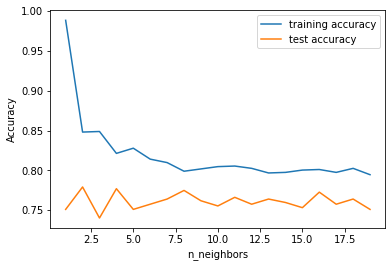



Training set accuracy: 0.79
Test set accuracy: 0.75

Confusion matrix:
Predicted   No  Yes  All
True                    
No         296   43  339
Yes         72   51  123
All        368   94  462

Classification report:
              precision    recall  f1-score   support

          No       0.80      0.87      0.84       339
         Yes       0.54      0.41      0.47       123

    accuracy                           0.75       462
   macro avg       0.67      0.64      0.65       462
weighted avg       0.73      0.75      0.74       462

Cross-validation scores: [0.7804878  0.75880759 0.79674797 0.75609756 0.75067751]
Average cross-validation score: 0.77


In [21]:
# K- Nearest Neighbor Classification
print("Sample count per class:\n{}".format(survey['Yearly salary'].value_counts()))
print()
train_feature, test_feature, train_class, test_class = train_test_split(X,y, stratify=y,random_state=0)
print(len(train_class), len(train_class[train_class==0]))
print(len(test_class), len(test_class[test_class==0]))
print()
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_feature, train_class)
    # record training set accuracy
    training_accuracy.append(knn.score(train_feature, train_class))
    # record generalization accuracy
    test_accuracy.append(knn.score(test_feature, test_class)) 
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
print()
prediction=(knn.predict(test_feature))
print()
print("Training set accuracy: {:.2f}".format(knn.score(train_feature, train_class)))
print("Test set accuracy: {:.2f}".format(knn.score(test_feature, test_class)))
print()
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))
print()
print("Classification report:")
print(classification_report(test_class, prediction))
scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [22]:
# Naive Bayes Classification
nb = GaussianNB().fit(train_feature, train_class)
print("Training set score: {:.3f}".format(nb.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(nb.score(test_feature, test_class)))
prediction=(nb.predict(test_feature))
print()
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))
print()
print("Classification report:")
print(classification_report(test_class, prediction))
scores = cross_val_score(nb, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 0.762
Test set score: 0.751

Confusion matrix:
Predicted   No  Yes  All
True                    
No         269   70  339
Yes         45   78  123
All        314  148  462

Classification report:
              precision    recall  f1-score   support

          No       0.86      0.79      0.82       339
         Yes       0.53      0.63      0.58       123

    accuracy                           0.75       462
   macro avg       0.69      0.71      0.70       462
weighted avg       0.77      0.75      0.76       462

Cross-validation scores: [0.75067751 0.76422764 0.78590786 0.73441734 0.75609756]
Average cross-validation score: 0.76


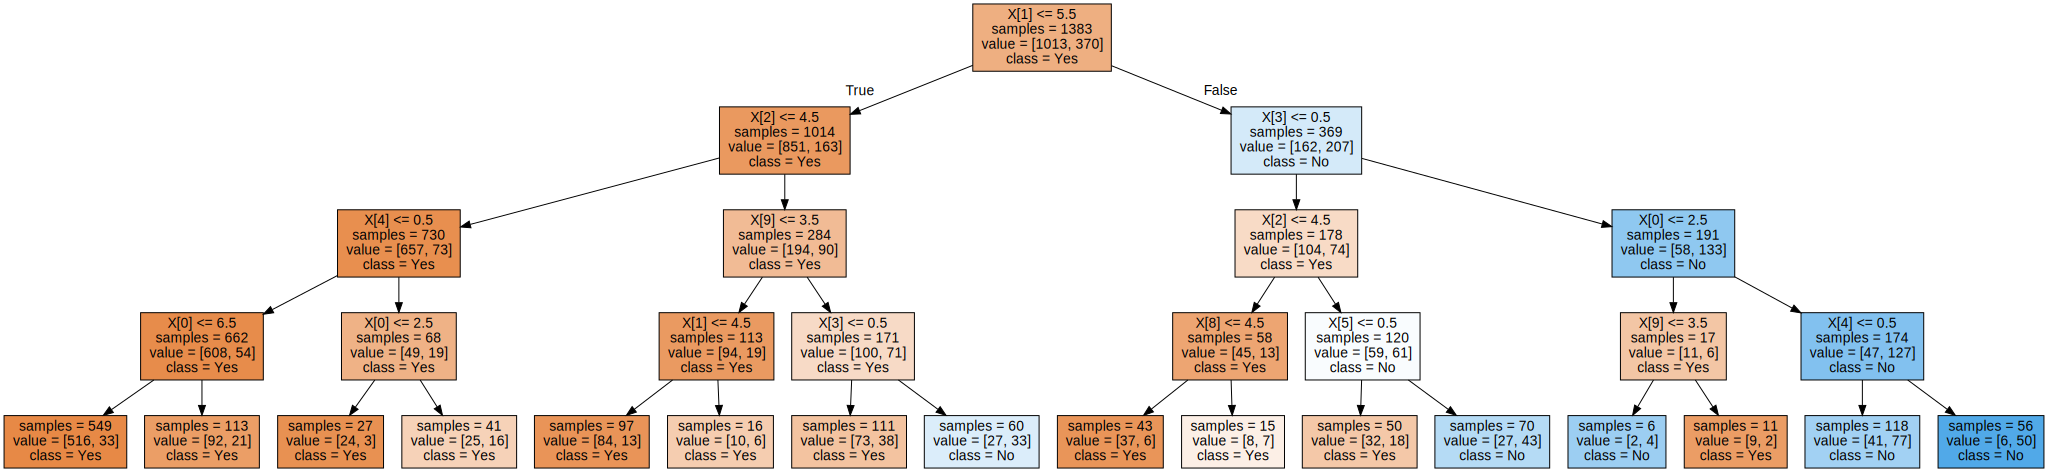

Training set score: 0.808
Test set score: 0.803

Confusion matrix:
Predicted   No  Yes  All
True                    
No         306   33  339
Yes         58   65  123
All        364   98  462

Classification report:
              precision    recall  f1-score   support

          No       0.84      0.90      0.87       339
         Yes       0.66      0.53      0.59       123

    accuracy                           0.80       462
   macro avg       0.75      0.72      0.73       462
weighted avg       0.79      0.80      0.80       462

Cross-validation scores: [0.79132791 0.78861789 0.80487805 0.79403794 0.78590786]
Average cross-validation score: 0.79


In [23]:
# Decision Trees
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(train_feature, train_class)
export_graphviz(tree, out_file="tree.dot", class_names=["Yes", "No"],impurity=False, filled=True)
with open("./tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))
print()
prediction = tree.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))
print()
print("Classification report:")
print(classification_report(test_class, prediction))
scores = cross_val_score(tree, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

## **Explain Your Work**

## **Task 7: Document and explain your models and results. (15 points)**

You are required to write **a brief document** (500-1000 words, not including the words in tables and figures of evaluation results) to discuss the process you went through to explore and compare different methods and choose parameter values. The document should also report the classification accuracy evaluation results of different methods you have experimented with and discuss how you finalize your choice. Make sure to include performance measures such as ``confusion matrix``, ``classification report``, ``cross validation scores``, and ``test set accuracy`` that are returned from the code. You are encouraged to include other presentations of evaluation results. 

Write your document below. Note that you may need to use multiple code and text blocks in order to produce a document with evaluation results.

# Selecting Features
Initially, I used all attributes as features for classification, and the accuracy of K-NN and Decision Tree was slightly different from the current accuracy, but the difference in accuracy was greater for Naive Bayes. Then I used the SelecKBest class to select features, which also produces better results but has a slight difference in accuracy when compared to Naive Bayes classification. Then, to select features from my dataset, I used the 'Feature Importance' selection method.
We can determine the feature importance of each feature in our dataset using the model's feature importance property.
Each feature of our data is assigned a score by the feature importance function; the higher the score, the more important or relevant the feature is to our output variable.
In Tree Based Classifiers, feature importance is a built-in class; I used Extra Tree Classifier to extract the top 10 features from the dataset.
# Classification Method
I tried K-Nearest Neighbor, Naive Bayes, and Decision Trees classification methods. 
### K-Nearest Neighbor
Neighbors-based classification is a type of lazy learning in that it does not attempt to build a general internal model but instead simply stores instances of the training data. Classification is determined by a simple majority vote of each point's k nearest neighbors.
Advantages: This algorithm is easy to implement, resistant to noisy training data, and effective with large amounts of training data.
Disadvantages: The value of K must be determined, and the computation cost is high due to the need to compute the distance of each instance to all of the training samples.
### Naive Bayes
The Naive Bayes algorithm is based on Bayes' theorem and the assumption of independence between every pair of features. Naive Bayes classifiers perform well in a wide range of real-world applications, including document classification and spam filtering.
Advantages: To estimate the required parameters, this algorithm requires only a small amount of training data. When compared to more sophisticated methods, Naive Bayes classifiers are extremely fast.
The disadvantage of Naive Bayes is that it is a poor estimator.
### Decision Trees
Given a set of attributes and classes, a decision tree generates a set of rules that can be used to classify the data.
Advantages: Decision Tree is easy to understand and visualize, requires little data preparation, and can handle both numerical and categorical data.
Disadvantages: Decision trees can generate complex trees that do not generalize well, and decision trees can be unstable because small variations in the data can result in the generation of a completely different tree.
# Conclusion
According to my results and model evaluation, the test set accuracy of k-NN, Naive Bayes, and Decision tree is 0.75, 0.751, and 0.803, respectively. As a result, in terms of test set accuracy, Decision Tree outperforms Naive Bayes and k-NN.
Cross validation scores for k-NN, Naive Bayes, and Decision tree are 0.77, 0.76, and 0.79, respectively. As a result, Decision Tree outperforms Naive Bayes and k-NN in terms of cross validation score.
Even though F-measure is the harmonic mean of precision and recall, we can use it to determine which classifier is the best in terms of precision and recall. For the 'No' and 'Yes' classes, the F-measure values of k-NN, Naive Bayes, and Decision tree are 0.84 and 0.47, 0.82 and 0.58, 0.87 and 0.59, respectively. As a result, we can conclude that Decision Tree outperforms Naive Bayes and k-NN in terms of precision and recall.
The accuracy of k-NN, Naive Bayes, and Decision tree, respectively, is 0.75, 0.75, and 0.80. As a result, Decision Tree outperforms Naive Bayes and k-NN in terms of accuracy.
In terms of model evaluation, the Decision Tree Classification method is best for my model, with higher values for Test set accuracy, Cross Validation Score, Precision and Recall (F1-measure), and Accuracy.

## Grading Rubrics

Your tasks 6 and 7 will be evaluated on correctness, classification accuracy, efficiency, report quality, and code quality. Make sure to thoroughly understand the following grading rubrics. 

(1) **Basics**: 10 points

You will be evaluated on whether you can accomplish the given tasks, i.e., a complete classification model. 

(2) **Execution efficiency**: 10 points 

*10 points*: your code finishes in seconds (this can vary for different methods and we will take that into consideration).

*5 points*: your code is clearly much slower than majority of the submissions.

*0 points**: your code will need to take hours to finish, OR mostly incorrect implementation which makes efficiency evaluation not meaningful.

(3) **Accuracy**: 15 points 

How much can you improve your classifier's accuracy to outperform our baseline, which is some very premitive model without any effort of improvment. We will run the codes of all students and compare your classifiers' performance.

*15 points*: Among the best performance in the class AND performance clearly better than the baseline results.

**12 points*: Stronger performance than majority of the class AND performance slightly stronger than the baseline results.

*9 points*: Average performance in the class AND performance on par with the baseline results.

*6 points*: weaker performance than majority of the class OR performance weaker than the baseline results.

*3 points*: Weaker performance than 85% of the class OR performance clearly weaker than the baseline results.

*0  points*: Mostly incorrect implementation which makes accuracy evaluation not meaningful.

(4) **Report---clarity, organization, correctness, thoroughness**: 15 points

Your report will be graded based on whether it is clear and well organized, whether the discussion is correct and logical, whether it demonstrates proper understanding of classification, and whether it is thorough in presenting designing choices and results. 

(5) **Quality---clarity, organization, modularity, comments**: 10 points

Follow good coding standards to make your program easy to understand and easy to maintain/extend.  Provide sufficient comments in your code and make it self-explaining. 

*High mark* : 10 points

*Medium mark* : 7 points

*Low mark* : 3 points

*Poor*: 0 points

(4) **Total score of Tasks 6 and 7**: 60 points

Your score will be calculated from the individual break-ups using the following equation:

Basics + Efficiency + Accuracy +Report + Quality
